In [ ]:
!pip install scikit_learn matplotlib numpy pandas

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score ,accuracy_score


### **Regression Models**

In [ ]:
data = pd.read_csv('/content/Chocolate Sales.csv')

In [ ]:
data.head(n=10)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
5,Van Tuxwell,India,Smooth Sliky Salty,06-Jun-22,"$5,376",38
6,Oby Sorrel,UK,99% Dark & Pure,25-Jan-22,"$13,685",176
7,Gunar Cockshoot,Australia,After Nines,24-Mar-22,"$3,080",73
8,Jehu Rudeforth,New Zealand,50% Dark Bites,20-Apr-22,"$3,990",59
9,Brien Boise,Australia,99% Dark & Pure,04-Jul-22,"$2,835",102


In [ ]:
data.describe(include='all')

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
count,1094,1094,1094,1094,1094,1094.000000
unique,25,6,22,168,827,NaN
top,Kelci Walkden,Australia,50% Dark Bites,13-Jan-22,"$2,317",NaN
freq,54,205,60,16,5,NaN
mean,NaN,NaN,NaN,NaN,NaN,161.797989
std,NaN,NaN,NaN,NaN,NaN,121.544145
min,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,70.000000
50%,NaN,NaN,NaN,NaN,NaN,135.000000
75%,NaN,NaN,NaN,NaN,NaN,228.750000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder= LabelEncoder()
data['Sales Person_encodded'] = encoder.fit_transform(data['Sales Person'])
data['Country_encodded'] = encoder.fit_transform(data['Country'])
data['Product_encodded'] = encoder.fit_transform(data['Product'])

In [ ]:
data.describe(include='all')

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Sales Person_encodded,Country_encodded,Product_encodded
count,1094,1094,1094,1094,1094,1094.000000,1094.000000,1094.000000,1094.000000
unique,25,6,22,168,827,NaN,NaN,NaN,NaN
top,Kelci Walkden,Australia,50% Dark Bites,13-Jan-22,"$2,317",NaN,NaN,NaN,NaN
freq,54,205,60,16,5,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,161.797989,11.938757,2.439671,10.696527
std,NaN,NaN,NaN,NaN,NaN,121.544145,7.168786,1.732188,6.475745
min,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,70.000000,6.000000,1.000000,5.000000
50%,NaN,NaN,NaN,NaN,NaN,135.000000,12.000000,2.000000,11.000000
75%,NaN,NaN,NaN,NaN,NaN,228.750000,18.000000,4.000000,16.000000


In [ ]:
"""Numpy Axis is a type of direction through which the iteration starts.
Every operation in numpy has a specific iteration process through which the
operation proceeds. Moreover, there are two types of the iteration process:
Column order and Fortran order. Column order helps through the column axis,
and Fortran order helps through the row axis."""

"""Axis 0 is the direction along rows but performs column-wise operations."""
"""axis 1, according to the axis convention. For instance, it refers to the direction along columns performing operations over rows."""


data = data.drop(['Sales Person','Product','Country','Date'],axis=1)



In [ ]:
data['Amount'] = data['Amount'].str.replace('$','')
data['Amount'] = data['Amount'].str.replace(',','')

In [ ]:
data

,Amount,Boxes Shipped,Sales Person_encodded,Country_encodded,Product_encodded
0,5320,180,13,4,14
1,7896,94,23,2,2
2,4501,91,9,2,17
3,12726,342,12,0,17
4,13685,184,13,4,17
...,...,...,...,...,...
1089,4410,323,15,0,20
1090,6559,119,13,5,21
1091,574,217,5,1,16
1092,2086,384,8,2,10


In [ ]:
features = np.array(data[['Amount','Product_encodded','Sales Person_encodded' , 'Country_encodded']])
target = np.array(data['Boxes Shipped'])


In [ ]:
features.shape

(1094, 4)

In [ ]:
target.shape

(1094,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x , test_x , train_y , test_y = train_test_split(features,target)

In [ ]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [ ]:
print(mean_squared_error(test_y,model.predict(test_x)))
print(r2_score(test_y,model.predict(test_x)))


14072.467589528986
-0.007271666931044418


In [ ]:
model_2 = svm.SVR()
model_2.fit(train_x,train_y)

SVR()

In [ ]:
print(mean_squared_error(test_y,model_2.predict(test_x)))
print(r2_score(test_y,model_2.predict(test_x)))

15091.962567286322
-0.08024454103008027


In [ ]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import cv2
import os

# Classification **Models**

In [ ]:
df = pd.read_csv('/content/credit_data.csv')


In [ ]:
df.describe(include='all')
features = df[['income','age','loan']]
target = df['default']

In [ ]:
features = np.array(features)
target = np.array(target)

In [ ]:
train_x , test_x , train_y , test_y = train_test_split(features,target)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1500, 3)
(1500,)
(500, 3)
(500,)


In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
model = LogisticRegression()
predict = cross_validate(model,train_x,train_y,cv=2
                         )


In [ ]:
predict['test_score'].mean()

0.9453333333333334

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
pred = model.predict(test_x)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))

0.834
[[409  13]
 [ 70   8]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
x = MinMaxScaler()
df['income'] = x.fit_transform(df[['income']])

In [ ]:

features = df[['income','age','loan']]
target = df['default']

In [ ]:
train_x , test_x , train_y , test_y = train_test_split(features,target)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1500, 3)
(1500,)
(500, 3)
(500,)


In [ ]:
model = LogisticRegression()
predict = cross_validate(model,train_x,train_y,cv=100
                         )


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(predict['test_score'].mean())

0.9473333333333335


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model= GaussianNB()
model.fit(train_x,train_y)
print(accuracy_score(test_y,model.predict(test_x)))
print(confusion_matrix(test_y,model.predict(test_x)))


0.924
[[415   3]
 [ 35  47]]


In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn import svm

In [ ]:
model = svm.SVC(C=1000000000000)
model.fit(train_x,train_y)
print(accuracy_score(test_y,model.predict(test_x)))
print(confusion_matrix(test_y,model.predict(test_x)))

0.952
[[411   7]
 [ 17  65]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
best_param = {'max_depth':np.arange(1,100)}
model =DecisionTreeClassifier(max_depth=71)
model.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=71)

In [ ]:
print(accuracy_score(test_y,model.predict(test_x)))
print(confusion_matrix(test_y,model.predict(test_x)))

0.988
[[415   4]
 [  2  79]]


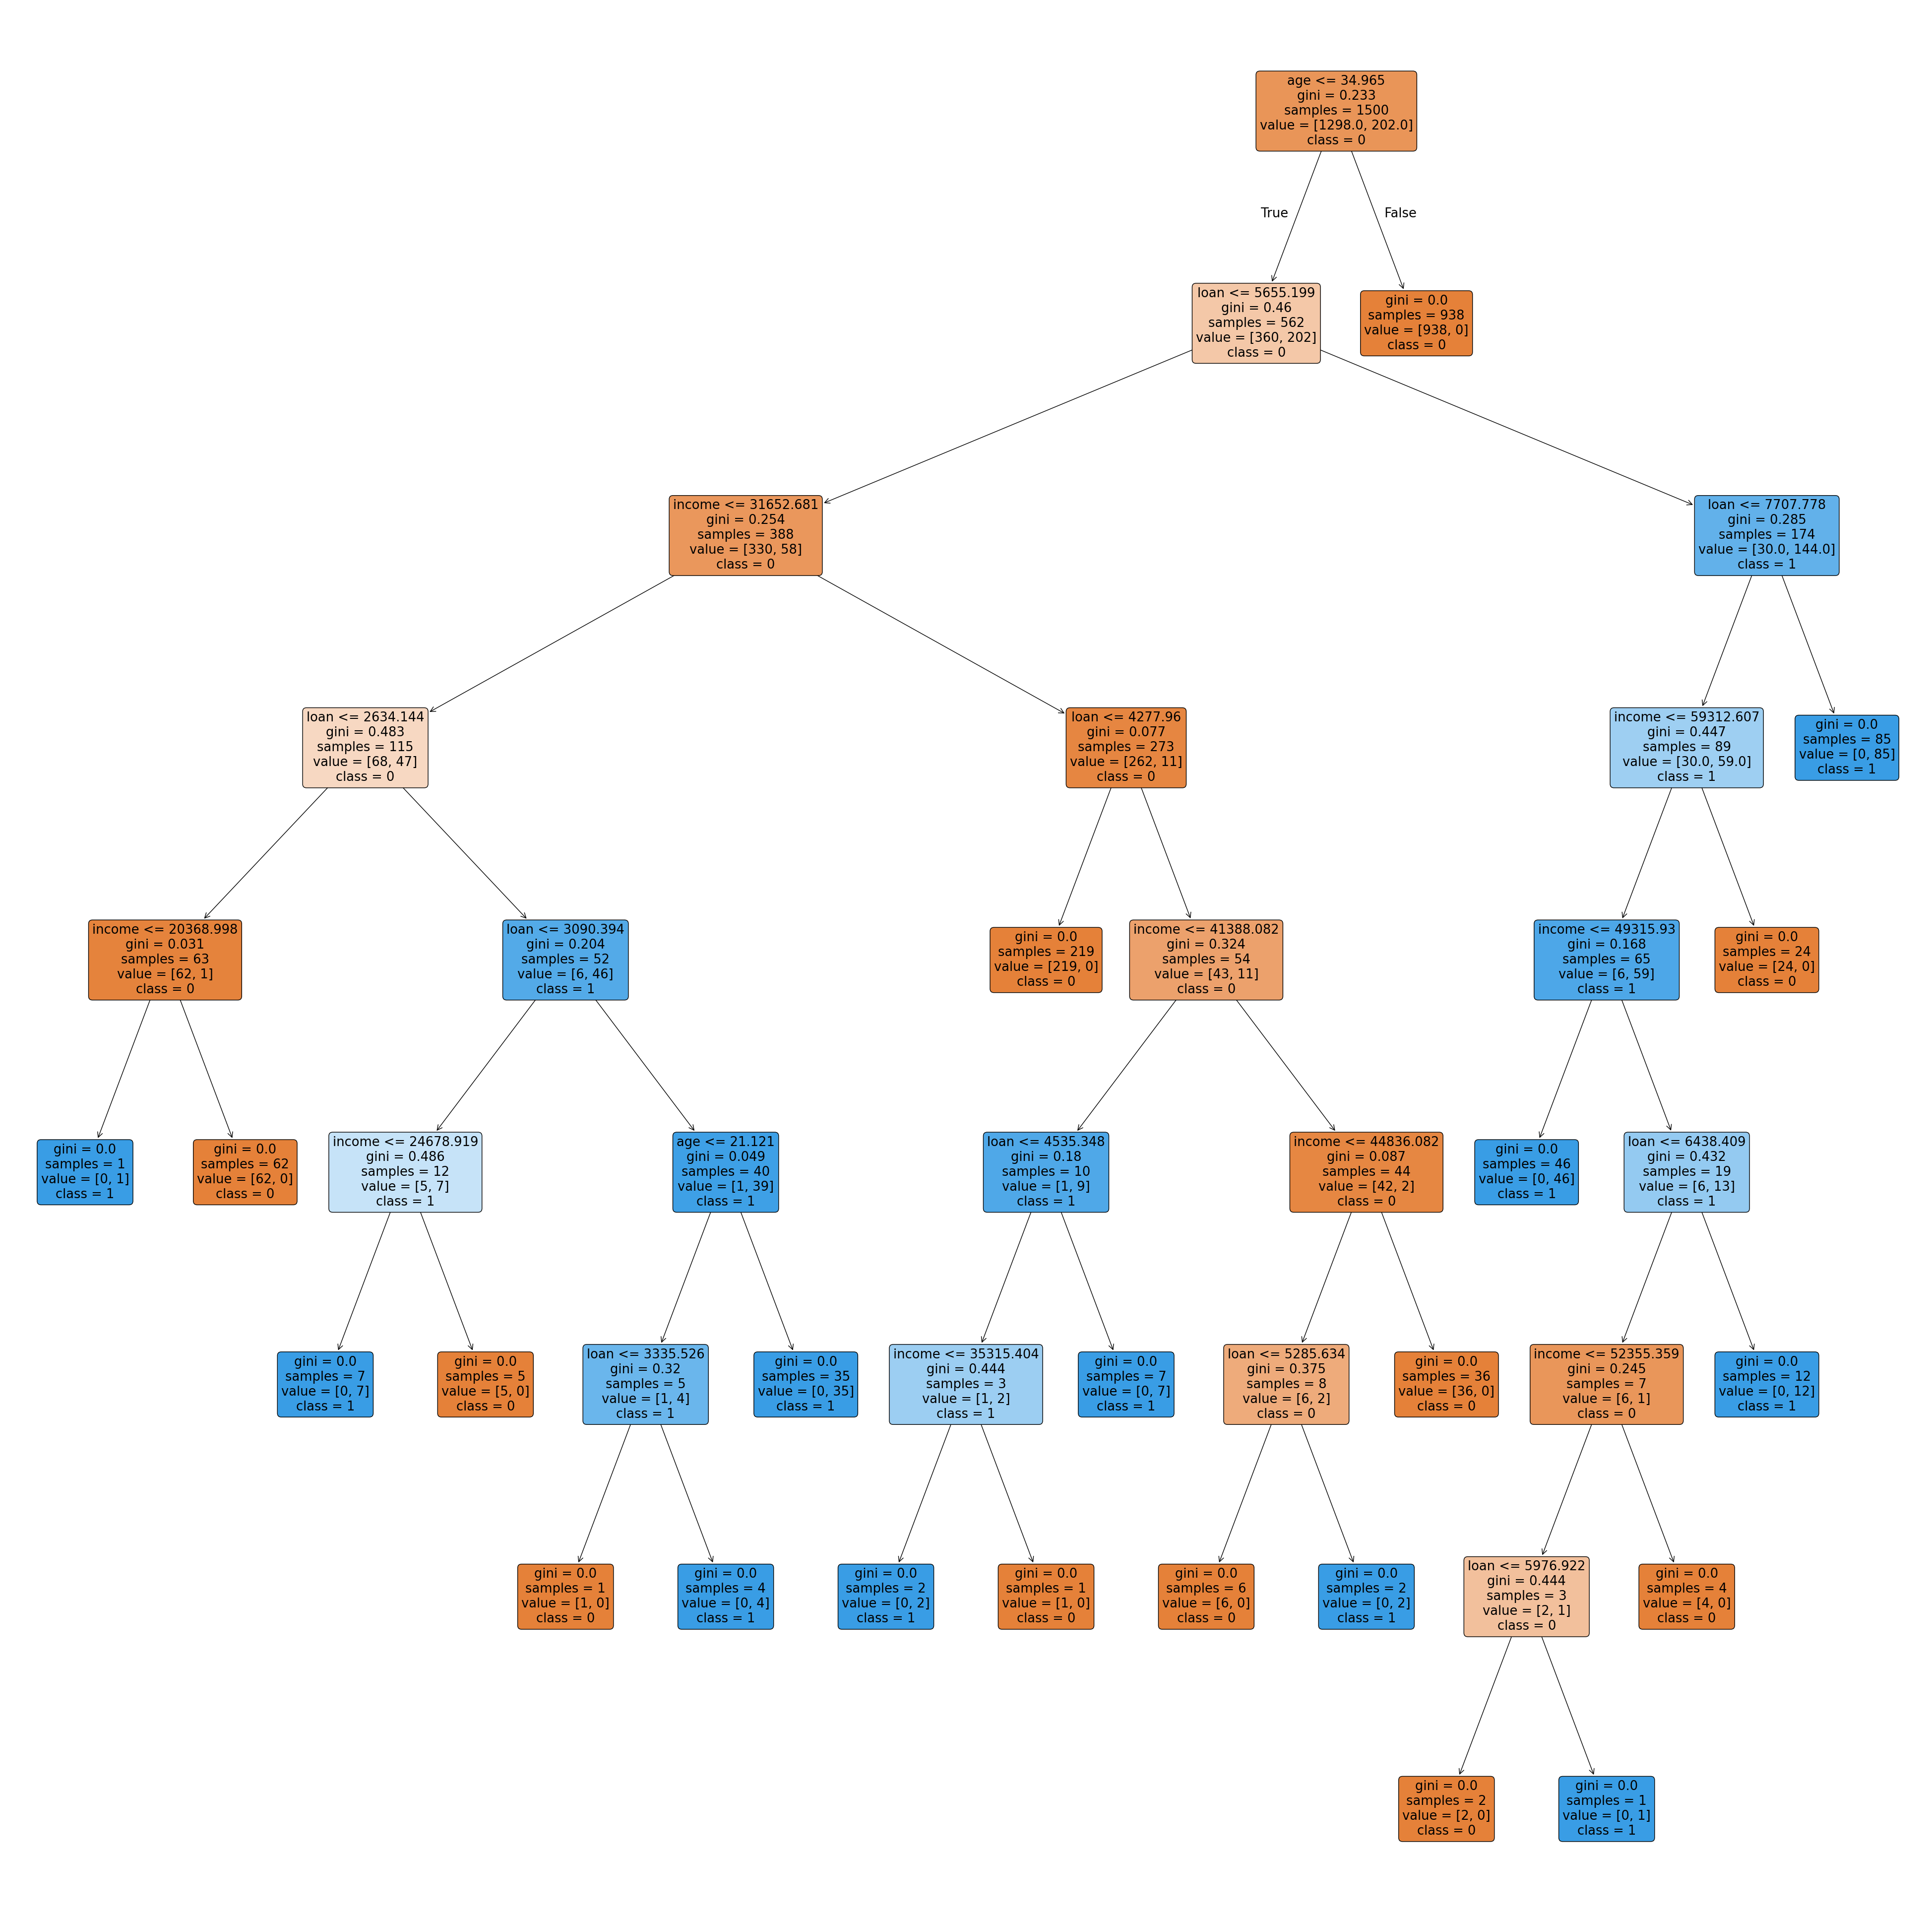

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(model,feature_names=['income','age','loan'],class_names=['0','1'],filled=True , rounded = True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(train_x,train_y)
print(accuracy_score(test_y,model.predict(test_x)))
print(confusion_matrix(test_y,model.predict(test_x)))

0.986
[[416   3]
 [  4  77]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model =AdaBoostClassifier(n_estimators=1000)
model.fit(train_x,train_y)
print(accuracy_score(test_y,model.predict(test_x)))
print(confusion_matrix(test_y,model.predict(test_x)))

0.986
[[415   4]
 [  3  78]]


## **Ham or Spam Project **

In [2]:
from sklearn.model_selection import cross_validate , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer , CountVectorizer
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('/content/emails.csv')

In [4]:
data.describe(include='all')

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
unique,5172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Email 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,NaN,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000


In [5]:
data.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


In [6]:
data=data.dropna()

In [7]:
data.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


In [8]:
target = data.Prediction
features_names = np.array(data.drop(['Email No.','Prediction'],axis = 1).columns)

In [9]:
features =np.array(data[features_names])

In [10]:
vect_ = TfidfTransformer()
features = vect_.fit_transform(features)

In Natural Language Processing (NLP), the **Document-Term Matrix (DTM)** and **Similarity Matrix** are key concepts used for text analysis and comparison:

### 1. **Document-Term Matrix (DTM):**
A Document-Term Matrix is a mathematical representation of a collection of documents. It is structured as a matrix where:
- **Rows** represent individual documents.
- **Columns** represent unique terms (words) across all documents.
- Each cell contains the frequency (or weight, such as TF-IDF) of a term in a document.

For example:
| Document | Term1 | Term2 | Term3 |
|----------|-------|-------|-------|
| Doc1     | 2     | 0     | 1     |
| Doc2     | 0     | 3     | 1     |

This matrix is widely used in text mining and NLP tasks like topic modeling, clustering, and classification.

### 2. **Similarity Matrix:**
A Similarity Matrix is used to measure the similarity between pairs of documents or terms. It is structured as a square matrix where:
- **Rows and columns** represent documents (or terms).
- Each cell contains a similarity score between two documents (or terms).

Common similarity measures include:
- **Cosine Similarity:** Measures the cosine of the angle between two vectors (documents).
- **Jaccard Similarity:** Measures the overlap between two sets of terms.
- **Euclidean Distance:** Measures the straight-line distance between two vectors.

For example, a similarity matrix for three documents might look like this:
|          | Doc1  | Doc2  | Doc3  |
|----------|-------|-------|-------|
| **Doc1** | 1.0   | 0.8   | 0.5   |
| **Doc2** | 0.8   | 1.0   | 0.6   |
| **Doc3** | 0.5   | 0.6   | 1.0   |

This matrix is useful for tasks like clustering, recommendation systems, and information retrieval.

Let me know if you'd like to see examples or code for creating these matrices!

In [11]:
# doc_term metrix
features.toarray().T

array([[0.        , 0.02715833, 0.        , ..., 0.        , 0.01880745,
        0.0639609 ],
       [0.        , 0.04180655, 0.        , ..., 0.        , 0.06235711,
        0.06609842],
       [0.06064764, 0.06289661, 0.03254548, ..., 0.02726068, 0.00725944,
        0.01122186],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00531122, 0.        , ..., 0.        , 0.01471231,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
#similarity metrix
(features*features.T).toarray()

array([[1.        , 0.45989958, 0.20118335, ..., 0.39333962, 0.44714997,
        0.4615095 ],
       [0.45989958, 1.        , 0.4259184 , ..., 0.67934071, 0.78563536,
        0.83651207],
       [0.20118335, 0.4259184 , 1.        , ..., 0.41711766, 0.44148164,
        0.49472282],
       ...,
       [0.39333962, 0.67934071, 0.41711766, ..., 1.        , 0.70783787,
        0.74513382],
       [0.44714997, 0.78563536, 0.44148164, ..., 0.70783787, 1.        ,
        0.84090594],
       [0.4615095 , 0.83651207, 0.49472282, ..., 0.74513382, 0.84090594,
        1.        ]])

In [13]:
features =(features).toarray()

In [14]:
train_x , test_x , train_y , test_y = train_test_split(features,target,test_size=0.2)

# **Model Training**

In [15]:
models = {
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "SVM":svm.SVC(),
    "Navie Bayes":GaussianNB(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "AdaBoost":AdaBoostClassifier()
}

best_param = {
    "Logistic Regression":{},
    "KNN":{'n_neighbors':np.arange(1,100)},
    "SVM":{'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001]},
    "Navie Bayes":{},
    "Decision Tree":{'max_depth':np.arange(1,100)},
    "Random Forest":{'n_estimators':np.arange(1,100)},
    "AdaBoost":{'n_estimators':np.arange(1,100)}
}


In [ ]:
for model_name , model in models.items():
  model = GridSearchCV(model,best_param[model_name])
  model.fit(train_x,train_y)
  print(model_name)
  print(model.best_params_)
  print(accuracy_score(test_y,model.predict(test_x)))
  print(confusion_matrix(test_y,model.predict(test_x)))

In [16]:
model = svm.SVC(C=1000 , gamma=1)
model.fit(train_x,train_y)
print(accuracy_score(test_y,model.predict(test_x)))
print(confusion_matrix(test_y,model.predict(test_x)))

0.9816425120772947
[[747   8]
 [ 11 269]]


Testing

Input Preproccesing

In [18]:
import nltk
import string

In [19]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer , WordNetLemmatizer
import re
!pip install contractions
from contractions import fix


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 8.0 MB/s eta 0:00:00


In [73]:
mail = input("Enter mail you want to check : ")

Enter mail you want to check : Subject: Your Package Is on Hold - Action Required Immediately!  Dear Customer,  We attempted to deliver your package, but there was an issue with your shipping address. To avoid returning the package to the sender, please update your information within 48 hours.  Click here to update your shipping details: Update Address Now  Failure to do so may result in additional charges or loss of the package. If you have any questions, contact us at support@fakedelivery.com.  Thank you for choosing our service.  Best regards, Fake Delivery Service Team


In [75]:
#lowering case
mail = mail.lower()

#Removing Punctuations
mail = mail.translate(str.maketrans('','',string.punctuation))


vocab = features_names.tolist()
#CountVectorization
vect_ = CountVectorizer(vocabulary=vocab)
features = vect_.fit_transform([mail])

#Tfidf vectorizer
vect__ = TfidfTransformer()
features = vect__.fit_transform(features)



In [76]:
model.predict(features.toarray())
print("Spam" if model.predict(features.toarray())==1 else "Ham")

Ham


# **UnsuperVised Machine Learning**

**PCA (Principle Component Analysis)**

Principal Component Analysis (PCA) is like taking a big, messy picture and simplifying it into something easier to understand.

Imagine you have a dataset with lots of features (columns). PCA helps by finding the most important patterns in the data while keeping as much information as possible. It does this by:

Combining your original features into a smaller number of new features, called principal components.

These principal components capture the most important information or variation in your data.

It’s like reducing the number of dimensions in your data while still keeping its essence.

For example, if you had a dataset with 10 features, PCA might reduce it to just 2 or 3 principal components that explain most of the dataset's variance. It’s often used for data visualization, compression, or preprocessing for machine learning.

In [3]:
from sklearn.decomposition import PCA
from sklearn import datasets

In [21]:
faces = datasets.fetch_olivetti_faces()
data = faces.data
target = faces.target

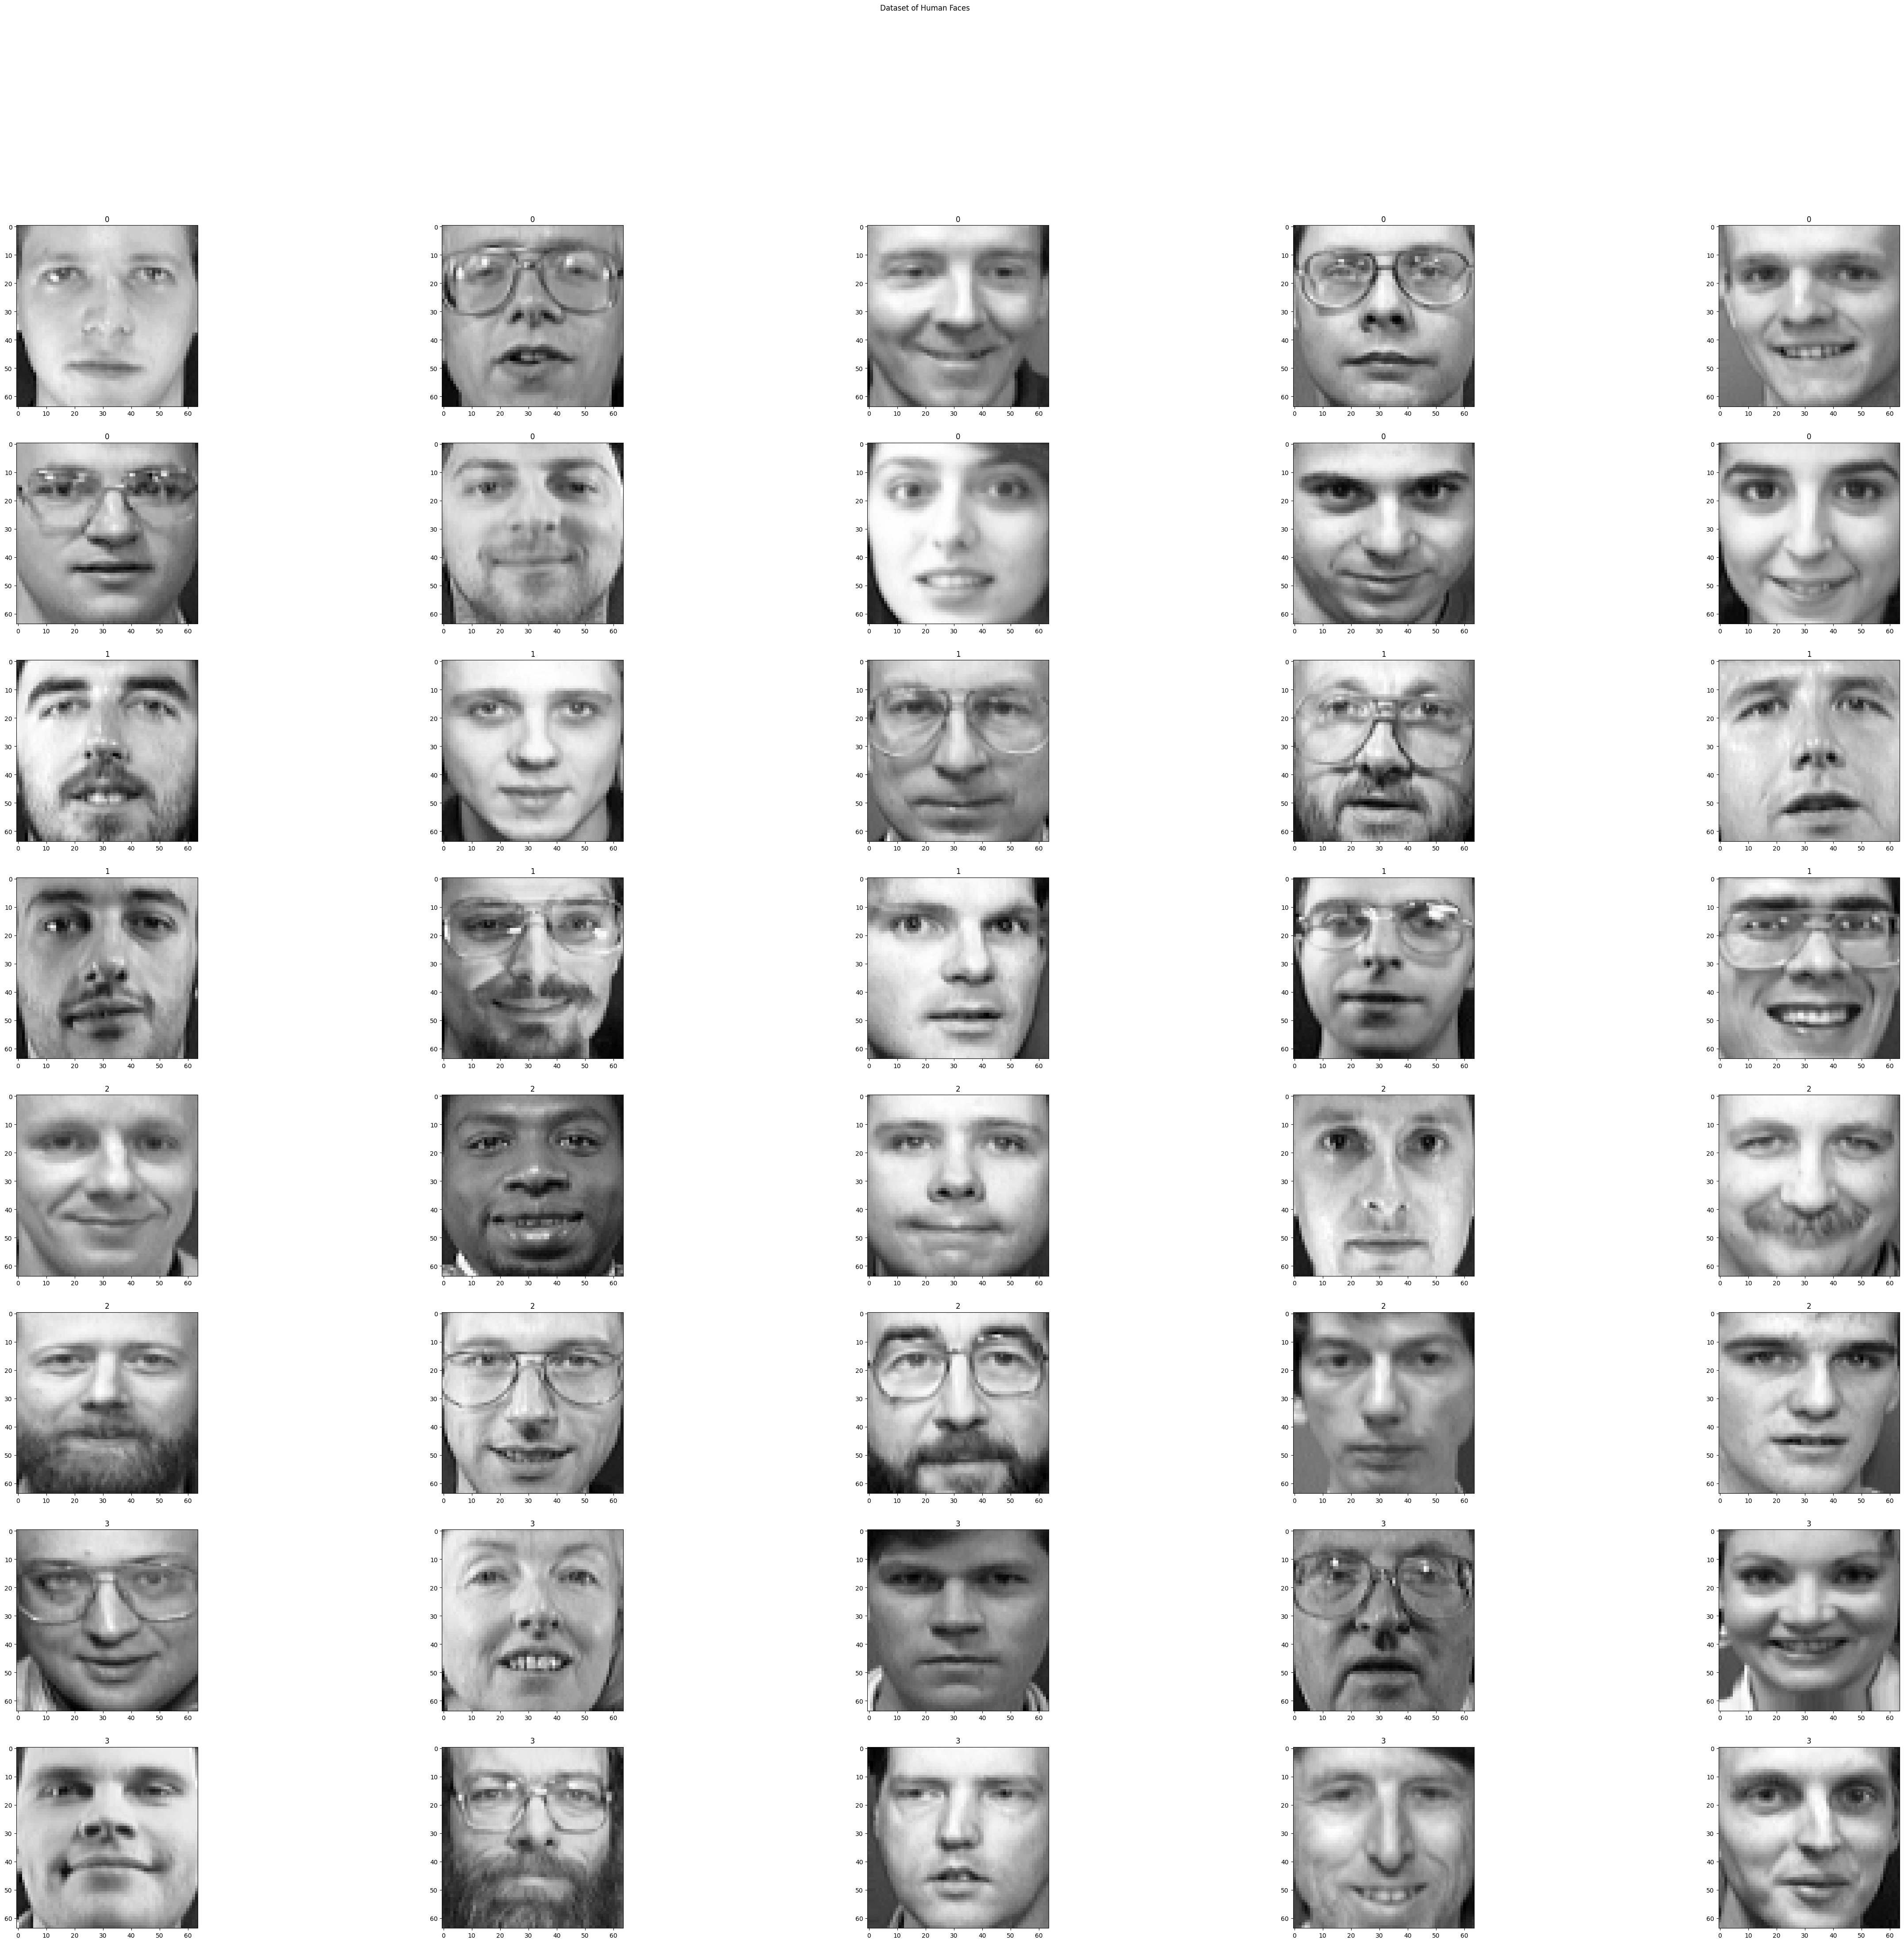

In [22]:
_, sub_ = plt.subplots(nrows=8,ncols=5,figsize=(60,50))
sub_ = sub_.flatten()
for i in target:
  ind = i*10
  sub_[i].imshow(data[ind].reshape(64,64),cmap='gray')
  sub_[i].set_title(target[i])
plt.suptitle("Dataset of Human Faces")
plt.show()


In [30]:
Pca = PCA(n_components=10)
Pca.fit(data)


PCA(n_components=10)

In [32]:
reduced_features = Pca.components_.reshape(10,64,64)

Visualising Reduced Dimessions

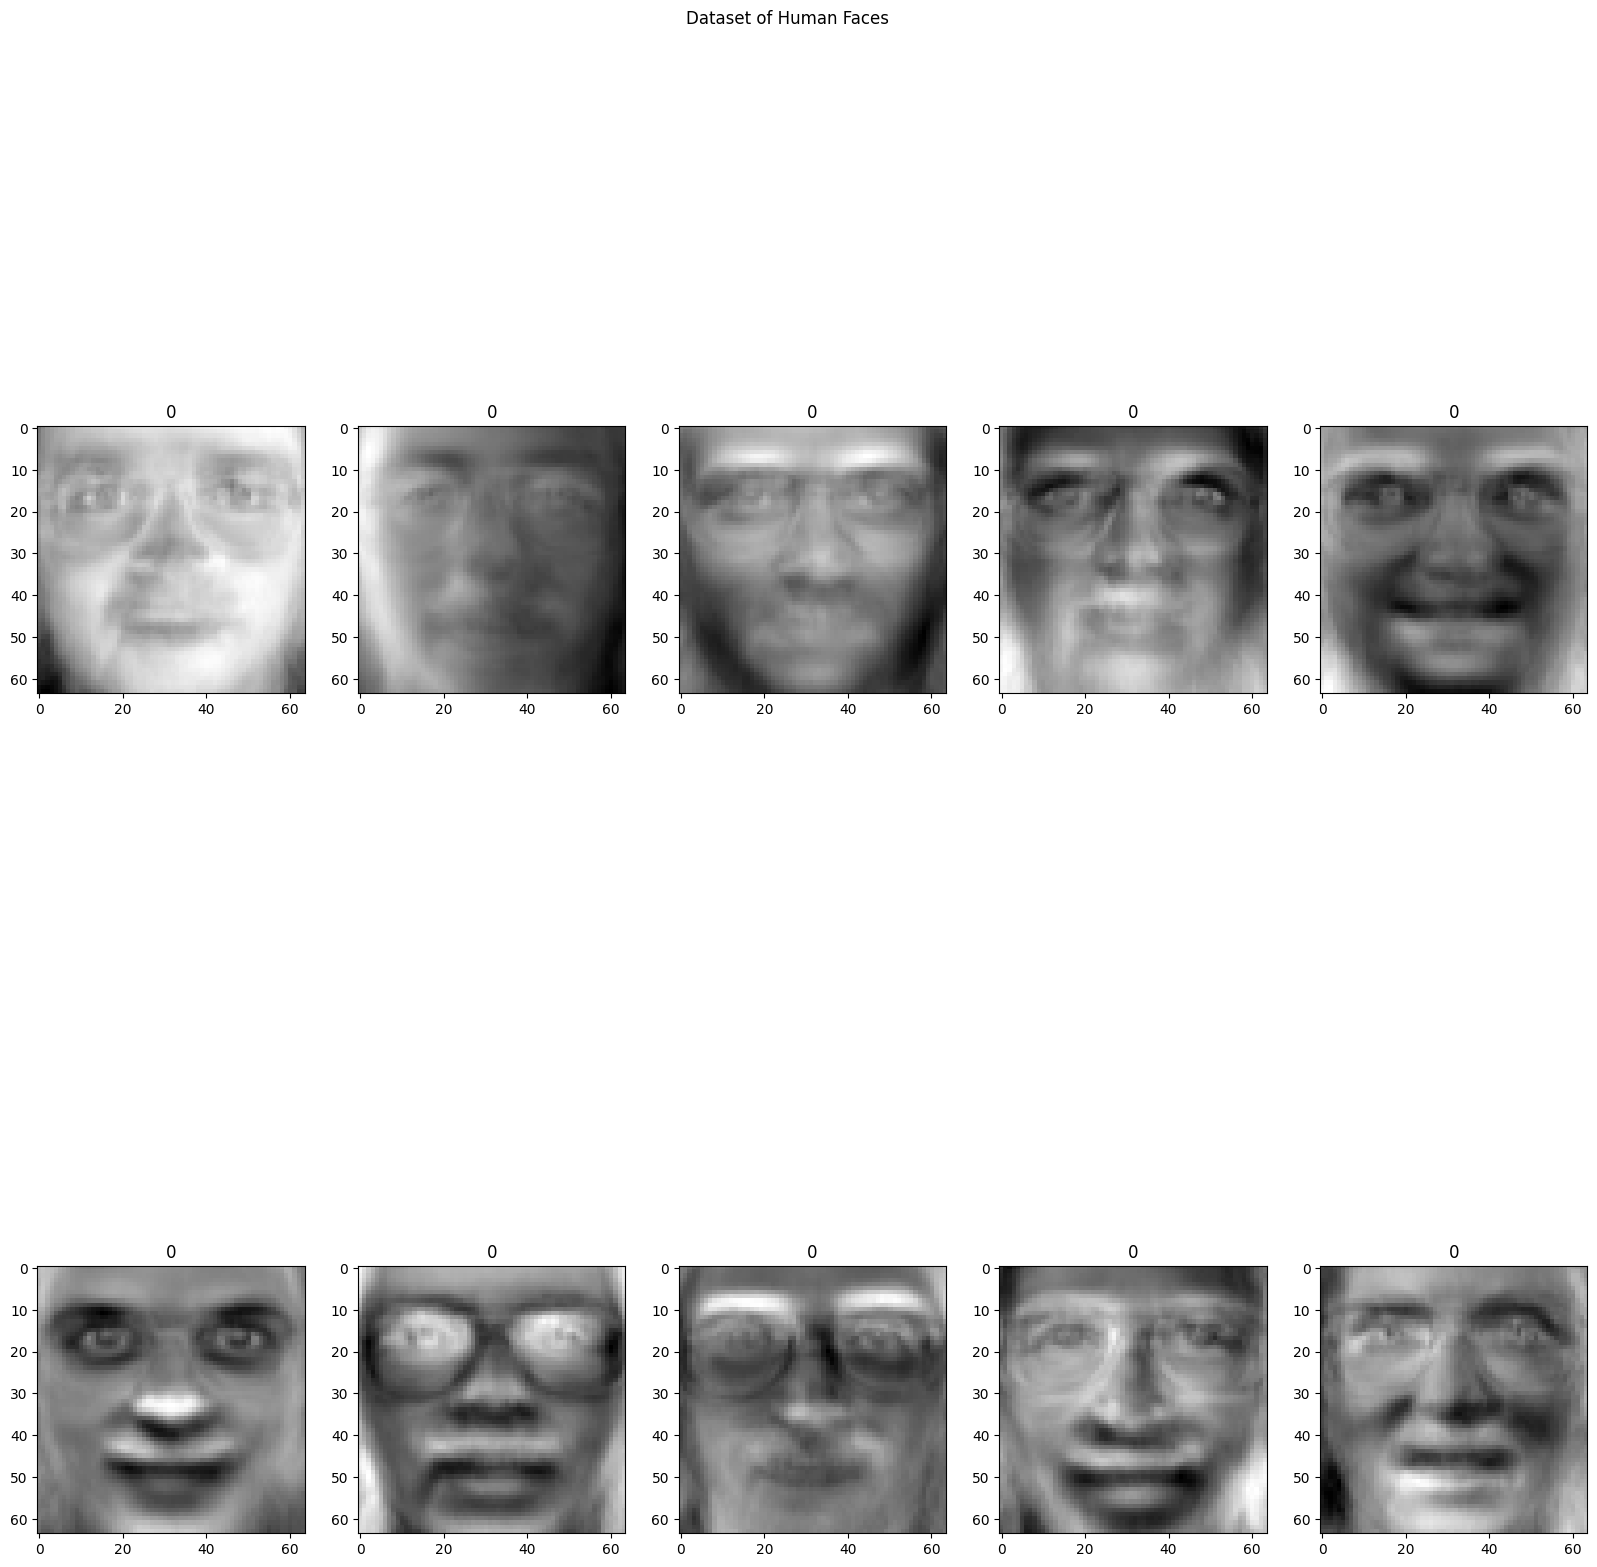

In [35]:
_, sub_ = plt.subplots(nrows=2,ncols=5,figsize=(20,20))

sub_ = sub_.flatten()
for i in range(10):
  sub_[i].imshow(reduced_features[i],cmap='gray')
  sub_[i].set_title(target[i])
plt.suptitle("Dataset of Human Faces")
plt.show()

### **KMean Clustering & DBSCAN**

[0 0 0 ... 0 0 0]


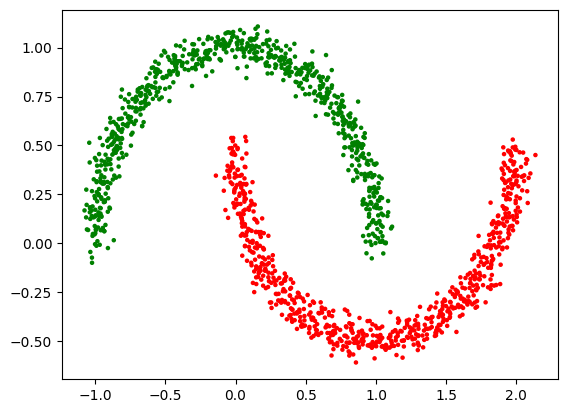

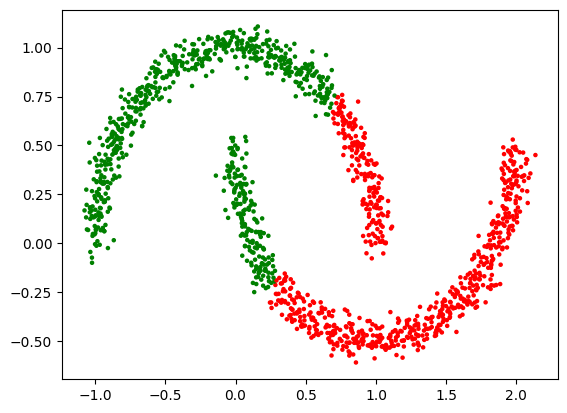

In [37]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
x , y = datasets.make_moons(n_samples=1500, noise=0.05,random_state=3)
x1 = x[:,0]
x2 = x[:,1]



est = DBSCAN(eps=.3)
est.fit(x)
y_pred = est.labels_.astype(int)
print(y_pred)
colors = np.array(["red","green"])
plt.scatter(x1,x2,s=5,color=colors[y_pred])
plt.show()


#by kmeans

est2 = KMeans(n_clusters=2, random_state=3)
est2.fit(x)
y_pred2 = est2.labels_.astype(int)
plt.scatter(x1,x2,s=5,color=colors[y_pred2])
plt.show()

Hierarchal Clustering

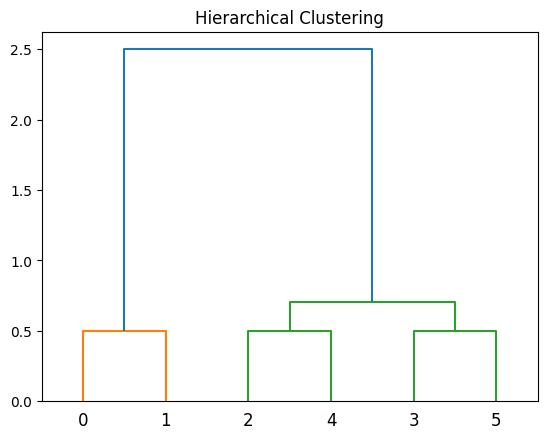

In [38]:
from scipy.cluster.hierarchy import dendrogram,linkage
from matplotlib import pyplot as plt
import numpy as np
x = np.array([[1, 1], [1.5, 1], [3, 3], [4, 4], [3, 3.5], [3.5, 4]])

linkage = linkage(x,"single")
dendrogram = dendrogram(linkage,truncate_mode="none")

plt.title("Hierarchical Clustering")
plt.show()